<a href="https://colab.research.google.com/github/DaielChom/ann-predict-future-sales/blob/master/08_Predict_price_with_Time_Series_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
download_data = False

if 'google.colab' in sys.modules:
    download_data = True

In [0]:
if download_data:
    !wget --no-cache -O init.py -q https://raw.githubusercontent.com/DaielChom/ann-predict-future-sales/master/init.py
    from init import download_utils, unzip_sales_dataset, dataset_dir
    download_utils(force_download=True)

In [10]:
if download_data:
    !mkdir ./local/datasets/
    !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=19208gOk2e6cpZ9dxtGF5HKHGYWn01VRo' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=19208gOk2e6cpZ9dxtGF5HKHGYWn01VRo" -O local/datasets/sales.zip && rm -rf /tmp/cookies.txt

--2020-06-09 12:43:39--  https://docs.google.com/uc?export=download&confirm=&id=19208gOk2e6cpZ9dxtGF5HKHGYWn01VRo
Resolving docs.google.com (docs.google.com)... 173.194.217.100, 173.194.217.101, 173.194.217.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.217.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-b4-docs.googleusercontent.com/docs/securesc/e1do87hh9iu1tu6klaccd273o4qkqkv2/qfh3e6pulfd5febfbir9o29a8pl2rqf0/1591706550000/02012202667471862451/00769459408905461114Z/19208gOk2e6cpZ9dxtGF5HKHGYWn01VRo?e=download [following]
--2020-06-09 12:43:39--  https://doc-14-b4-docs.googleusercontent.com/docs/securesc/e1do87hh9iu1tu6klaccd273o4qkqkv2/qfh3e6pulfd5febfbir9o29a8pl2rqf0/1591706550000/02012202667471862451/00769459408905461114Z/19208gOk2e6cpZ9dxtGF5HKHGYWn01VRo?e=download
Resolving doc-14-b4-docs.googleusercontent.com (doc-14-b4-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connectin

In [0]:
if download_data:
    unzip_sales_dataset()

In [72]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
    %load_ext tensorboard
import tensorflow as tf
tf.__version__

setting tensorflow version in colab


'2.2.0'

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [0]:
import random
import numpy as np
import progressbar
import pandas as pd
import matplotlib.pyplot as plt
import local.lib as lib


from init import dataset_dir

In [0]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, RepeatVector, TimeDistributed, LSTM, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
#from local.lib import DataPreparationRNN

In [0]:
from pandas import read_csv

In [0]:
dataset =pd.read_csv(dataset_dir+"sales_train.csv", header=0, index_col=0)

In [124]:
dataset.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
02.01.2013,0,59,22154,999.00,1.0
03.01.2013,0,25,2552,899.00,1.0
05.01.2013,0,25,2552,899.00,-1.0
06.01.2013,0,25,2554,1709.05,1.0
15.01.2013,0,25,2555,1099.00,1.0


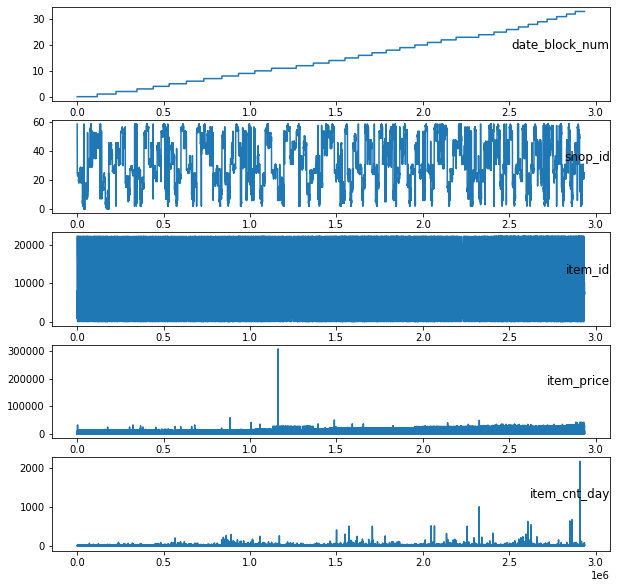

In [125]:
values = data.values
groups = [0, 1, 2, 3, 4]
i=1
plt.figure(figsize=(10,10))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(data.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [0]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [129]:
data=dataset.values()
data[1,:]

TypeError: ignored

In [0]:
look_back=1

In [0]:
  X_train, y_train = create_dataset(values, look_back)

In [115]:
X_train[:2]

array([[[0.0000e+00, 5.9000e+01, 2.2154e+04, 9.9900e+02, 1.0000e+00]],

       [[0.0000e+00, 2.5000e+01, 2.5520e+03, 8.9900e+02, 1.0000e+00]]])

In [0]:
times = values.shape[0]
train_size = int(times * 0.67)
test_size = times - train_size
train, test = values[0:train_size,groups], values[train_size-look_back:times,groups]


In [90]:
  scaler = MinMaxScaler(feature_range=(0, 1))
  trainN = scaler.fit_transform(train)
  testN = scaler.transform(test)
  X_train, y_train = create_dataset(trainN, look_back)
  X_test, y_test = create_dataset(testN, look_back)

TypeError: ignored

In [0]:
# from local.lib.DataPreparationRNN import split_sequence
from sklearn.preprocessing import MinMaxScaler

In [0]:
def DataPre_processing(look_back):
    times = values.shape[0]
    # split into train and test sets
    train_size = int(times * 0.67)
    test_size = times - train_size
    train, test = values[0:train_size,groups], values[train_size-look_back:times,groups]
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    trainN = scaler.fit_transform(train)
    testN = scaler.transform(test)
    X_train, y_train = create_dataset(trainN, look_back)
    X_test, y_test = create_dataset(testN, look_back)
    # Defino un scaler sólo para polución
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(train[:,0].reshape(-1,1))
    print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)
    return X_train, y_train, X_test, y_test, scaler

In [0]:
import datetime

In [0]:
model=Sequential()
model.add(LSTM(20,activation = 'relu',input_shape=(X_train.shape[1],X_train.shape[2]))) 
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse',metrics=['mae'])
!rm -rf ./logs/ 
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
  

In [0]:
model.fit(X_train,y_train,epochs=20, verbose=1, callbacks=[tensorboard_callback])

In [0]:
from sklearn.metrics import mean_squared_error
tf.keras.backend.clear_session()

In [77]:
from sklearn.metrics import mean_squared_error
tf.keras.backend.clear_session()
look_back = 1
X_train, y_train, X_test, y_test, scaler = DataPre_processing(look_back)
model1 = get_model(X_train,y_train)
y_est = model1.predict(X_test)
print('RMSE con los datos normalizados')
print(np.sqrt(mean_squared_error(y_test.flatten(), y_est.flatten())))

TypeError: ignored